In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('visceral_fat.csv')
df.head()

,number,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
0,1,20,NaN,0,73.5,125.0,28.1,"12,1",1.0,NaN,33.20,"41,0",1,3840,0
1,2,28,0.0,0,75.5,112.0,43.1,"11,5",1.0,76.0,21.50,"39,1",0,2810,0
2,5,21,1.0,0,70.5,116.0,41.4,"12,6",1.0,86.0,21.41,"39,5",0,2455,0
3,9,25,0.0,0,92.5,167.0,39.6,"16,2",4.0,NaN,55.36,"39,4",0,3400,0
4,13,33,1.0,0,79.0,137.0,67.8,"11,2",2.0,86.0,30.85,"40,2",1,3930,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number                         133 non-null    int64  
 1   age (years)                    133 non-null    int64  
 2   ethnicity                      132 non-null    float64
 3   diabetes mellitus              133 non-null    int64  
 4   mean diastolic bp (mmhg)       133 non-null    float64
 5   mean systolic bp (mmhg)        133 non-null    float64
 6   central armellini fat (mm)     133 non-null    float64
 7   current gestational age        133 non-null    object 
 8   pregnancies (number)           128 non-null    float64
 9   first fasting glucose (mg/dl)  103 non-null    float64
 10  bmi pregestational (kg/m)      132 non-null    float64
 11  gestational age at birth       133 non-null    object 
 12  type of delivery               133 non-null    int

In [ ]:
df.columns

Index(['number', 'age (years)', 'ethnicity', 'diabetes mellitus',
       'mean diastolic bp (mmhg)', 'mean systolic bp (mmhg)',
       'central armellini fat (mm)', 'current gestational age',
       'pregnancies (number)', 'first fasting glucose (mg/dl)',
       'bmi pregestational (kg/m)', 'gestational age at birth',
       'type of delivery', 'child birth weight (g)', 'gestational dm'],
      dtype='object')

In [ ]:
# convert gestational ages into days
df['current gestational age'] = [int(age[0])*7 + int(age[1]) for age in df['current gestational age'].str.split(',')]
df['gestational age at birth'] = [int(age[0])*7 + int(age[1]) for age in df['gestational age at birth'].str.split(',')]
df.head()

,number,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
0,1,20,NaN,0,73.5,125.0,28.1,85,1.0,NaN,33.20,287,1,3840,0
1,2,28,0.0,0,75.5,112.0,43.1,82,1.0,76.0,21.50,274,0,2810,0
2,5,21,1.0,0,70.5,116.0,41.4,90,1.0,86.0,21.41,278,0,2455,0
3,9,25,0.0,0,92.5,167.0,39.6,114,4.0,NaN,55.36,277,0,3400,0
4,13,33,1.0,0,79.0,137.0,67.8,79,2.0,86.0,30.85,282,1,3930,1


In [ ]:
df['gestational dm'] = df['gestational dm'].astype('bool')
df['diabetes mellitus'] = df['diabetes mellitus'].astype('bool')
df['type of delivery'] = df['type of delivery'].astype('bool')
df['ethnicity'] = df['ethnicity'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number                         133 non-null    int64  
 1   age (years)                    133 non-null    int64  
 2   ethnicity                      133 non-null    bool   
 3   diabetes mellitus              133 non-null    bool   
 4   mean diastolic bp (mmhg)       133 non-null    float64
 5   mean systolic bp (mmhg)        133 non-null    float64
 6   central armellini fat (mm)     133 non-null    float64
 7   current gestational age        133 non-null    int64  
 8   pregnancies (number)           128 non-null    float64
 9   first fasting glucose (mg/dl)  103 non-null    float64
 10  bmi pregestational (kg/m)      132 non-null    float64
 11  gestational age at birth       133 non-null    int64  
 12  type of delivery               133 non-null    boo

<Axes: >

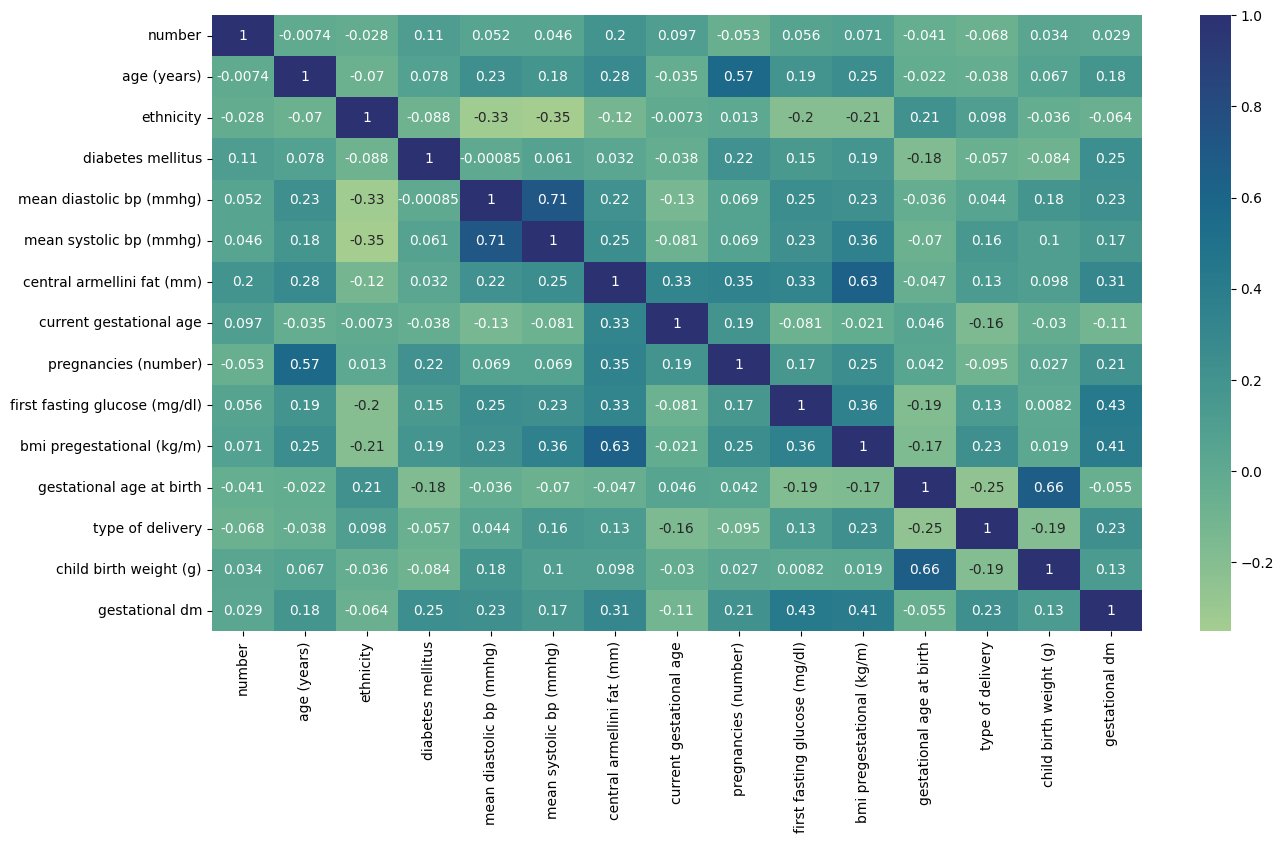

In [ ]:
# how the colummns are correlated
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap="crest")

In [ ]:
df.dropna(inplace=True)
# Dividing the Data into Inputs and Outputs X and Y respectively
X = df[['child birth weight (g)','bmi pregestational (kg/m)','first fasting glucose (mg/dl)','central armellini fat (mm)','age (years)']]
y = df["gestational dm"]

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model with n_estimators=5
random_forest = RandomForestClassifier(n_estimators=5)

# Fit the model on your training data
random_forest.fit(X_train, y_train)

# Make predictions using the trained model
predictions = random_forest.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions using the trained model
predictions = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_matrix)

Accuracy: 0.9523809523809523
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8
Confusion Matrix:
 [[18  0]
 [ 1  2]]


In [ ]:
import pickle

pickle.dump(random_forest,open("modelD.pkl","wb"))

In [ ]:
# Load the trained model
model = pickle.load(open("modelD.pkl", "rb"))

# Define the feature data
features = [
#    [2625, 26.65, 0, 39.9, 25] #0
     [3940, 43.16, 84, 62.8, 27]
]

model.fit(X_train, y_train)

# Make predictions using the loaded model
predictions = model.predict(features)

# Print the predictions
for prediction in predictions:
    print("Prediction:", prediction)

Prediction: True
